In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

Class
M    211
H    142
L    127
Name: count, dtype: int64

Number of students with Middle-Level grade (70-89) are 211, 
Number of students with High-Level grade (90-100 are) 142 and 
Number of students with Low-Level grade (0-69) are 127


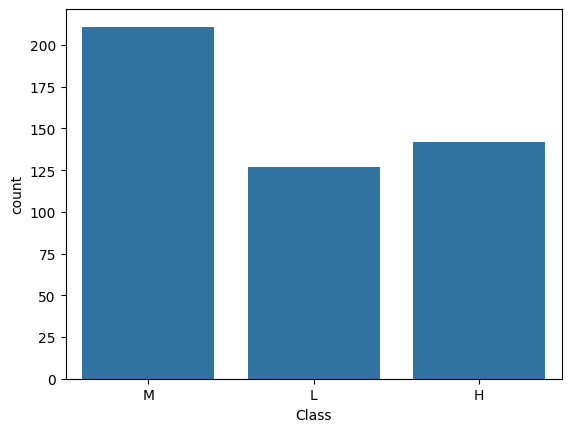

In [10]:
x=(data['Class'].value_counts())
print(x)

sns.countplot(data=data, x="Class")
print(f'\nNumber of students with Middle-Level grade (70-89) are {x.iloc[0]}, \nNumber of students with High-Level grade (90-100 are) {x.iloc[1]} and \nNumber of students with Low-Level grade (0-69) are {x.iloc[2]}')


In [6]:
cat_att = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']         
num_att = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
132,M,KW,KuwaIT,lowerlevel,G-02,C,IT,S,Father,0,3,10,3,No,Bad,Above-7,L
228,M,KW,KuwaIT,HighSchool,G-11,B,Math,S,Mum,73,84,77,81,Yes,Good,Above-7,H
473,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,S,Father,85,88,79,70,Yes,Good,Under-7,M
42,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,10,12,7,33,Yes,Good,Above-7,L
360,M,Jordan,Jordan,lowerlevel,G-02,A,Arabic,F,Father,20,88,31,28,Yes,Good,Above-7,M
